<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

## Loading Data to Pandas DataFrame

In [20]:
df = pd.read_csv("real-estate.csv")
df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

## Droping Unnecessary Columns

In [21]:
df = df.drop(columns=["No", "X1 transaction date"])
df

X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
0                                 10     24.98298     121.54024   
1                                  9     24.98034     121.53951   
2                                  5     24.98746     121.54391   
3                                  5     24.98746     121.54391   
4                                  5     24.97937     121.54245   
..                               ...          ...           ...   
409                                0     24.94155     121.50381   
410                                9     24.97433     121.54310   
411                                7     24.97923     121.53986   
412                                5     24.96674     121.54067   
413                                9     24.97433     121.54310   

     Y house price of unit area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

## Splitting Data to Train and Test

In [29]:
X = df[["X2 house age", "X3 distance to the nearest MRT station",
        "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
y = df["Y house price of unit area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualizing Data Distribution and Correlation

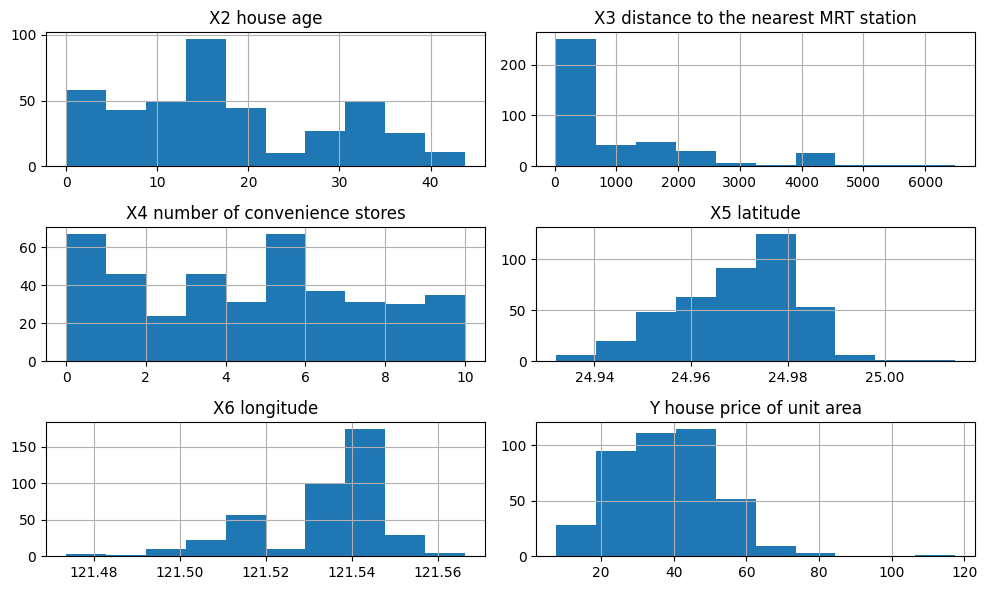

In [30]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

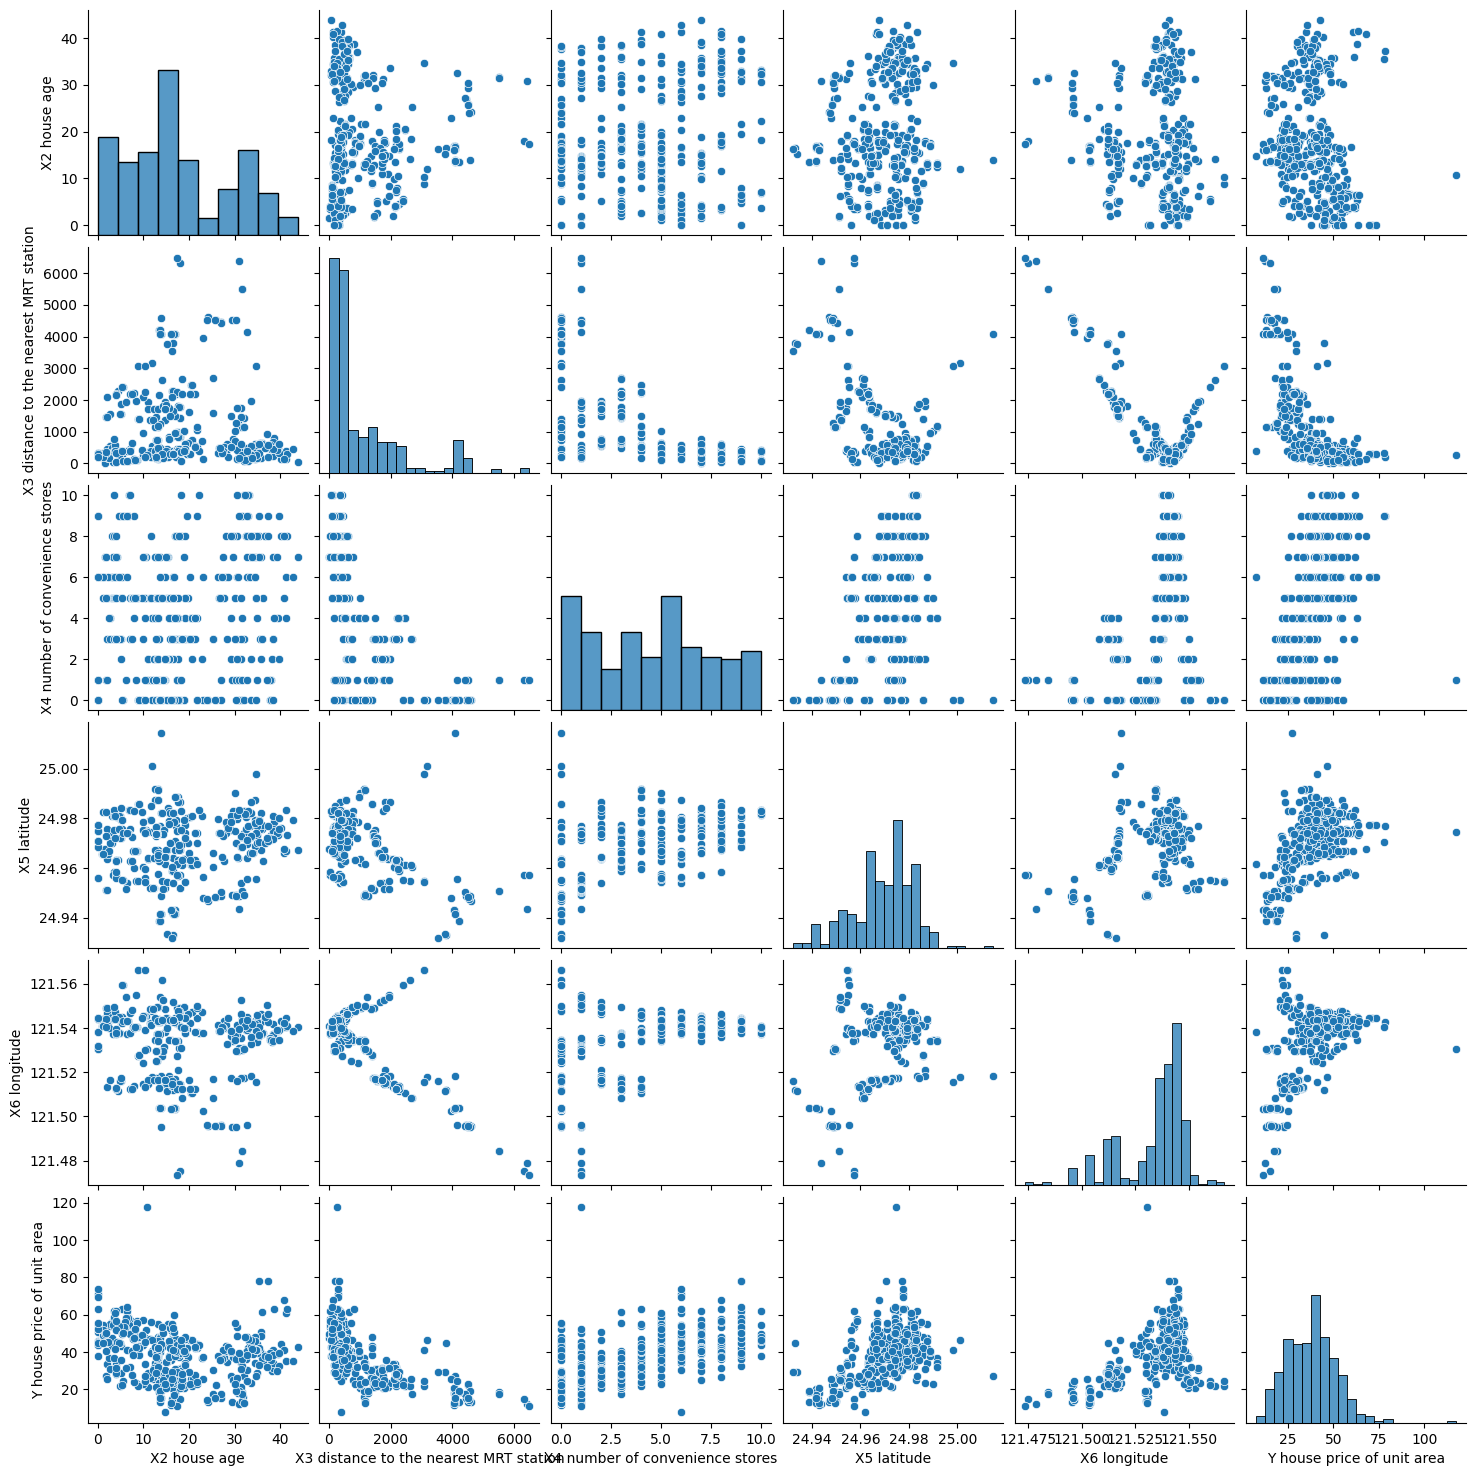

In [31]:
sns.pairplot(df)
plt.show()

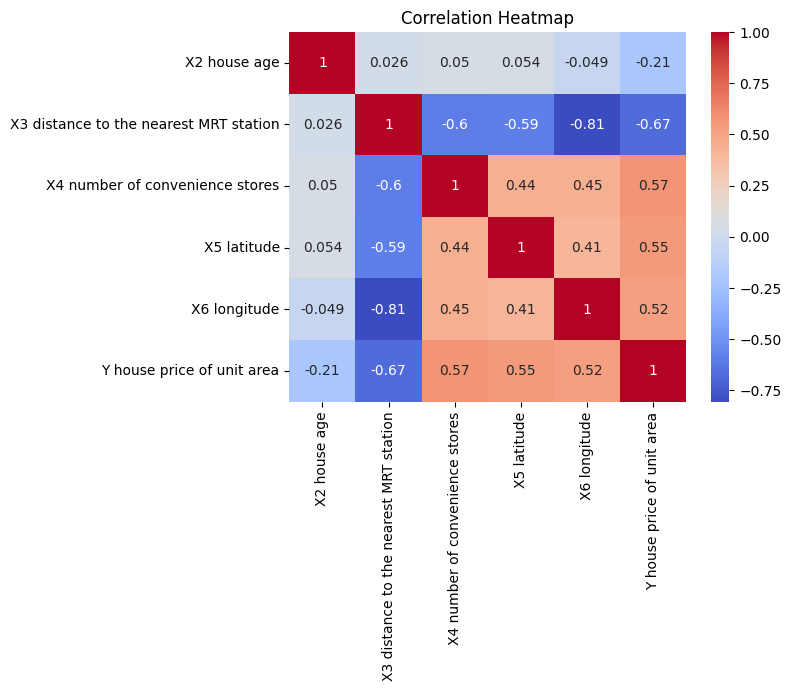

In [32]:
# correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
def evaluate(test, pred):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)
    
    print(f"MSE: {mse},\tR-squared: {r2}")

In [34]:
# first, we scale the data to prevent high numbers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate(y_test, y_pred)

MSE: 54.58094520086212,	R-squared: 0.6746481382828176


## Polynomial Regression

In [43]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly2D = poly.fit_transform(X_train)
X_test_poly2D = poly.transform(X_test)

model2D = LinearRegression()
model2D.fit(X_train_poly2D, y_train)
y_pred = model2D.predict(X_test_poly2D)
evaluate(y_test, y_pred)

MSE: 41.85048243854698,	R-squared: 0.7505332250103937


## Ridge Regression

In [44]:
alpha = 1.0
ridge_model2D = Ridge(alpha=alpha)
ridge_model2D.fit(X_train_poly2D, y_train)
y_pred = ridge_model2D.predict(X_test_poly2D)
evaluate(y_test, y_pred)

MSE: 41.77960040677197,	R-squared: 0.7509557461103018


## Lasso Regression

In [45]:
alpha = 1.0
lasso_model2D = Lasso(alpha=alpha)
lasso_model2D.fit(X_train_poly2D, y_train)
y_pred = lasso_model2D.predict(X_test_poly2D)
evaluate(y_test, y_pred)

MSE: 49.26467698158054,	R-squared: 0.7063379112643202


## Elastic Net Regression

In [46]:
alpha = 1.0 # regularization strength
l1_ratio = 0.5  # mix ratio between Lasso and Ridge
elastic_net_model2D = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model2D.fit(X_train_poly2D, y_train)
y_pred = elastic_net_model2D.predict(X_test_poly2D)
evaluate(y_test, y_pred)

MSE: 54.74928828542185,	R-squared: 0.6736446610479117


## XGBoost Regression 

In [47]:
xgb_model2D = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model2D.fit(X_train_poly2D, y_train)
y_pred = xgb_model2D.predict(X_test_poly2D)
evaluate(y_test, y_pred)

MSE: 31.013609032849228,	R-squared: 0.8151308043443898


# Assosiation Rules

In [48]:
# 0. Import Libraries
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. Data Loading
df = pd.read_csv("grocery.csv", header=None, names=['transactions'])

# 2. Preprocess Data
df['transactions'] = df['transactions'].str.split(',')
transactions_list = df['transactions'].tolist()

# 3. Apply TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_arr, columns=te.columns_)
df_encoded

# 4. Generate Frequent Itemsets
minsup = 0.2
frequent_itemsets = apriori(df_encoded, min_support=minsup, use_colnames=True)

# 5. Generate Association Rules
minconf = 0.6
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=minconf)

# 6. Display Rules
rules

antecedents consequents  antecedent support  consequent support  support  \
0        (MILK)     (BREAD)                0.25                0.65      0.2   
1       (SUGER)     (BREAD)                0.30                0.65      0.2   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40      0.2   
3       (SUGER)    (COFFEE)                0.30                0.40      0.2   
4       (MAGGI)       (TEA)                0.25                0.35      0.2   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.800000  1.230769    0.0375        1.75       0.250000  
1    0.666667  1.025641    0.0050        1.05       0.035714  
2    0.666667  1.666667    0.0800        1.80       0.571429  
3    0.666667  1.666667    0.0800        1.80       0.571429  
4    0.800000  2.285714    0.1125        3.25       0.750000